In [67]:
import collections

def morse_graph_from_edges(edges, grid_size):
    """Compute Morse graph from list of edges"""
    # Define multi-valued map from list of edges
    F = collections.defaultdict(list)
    for v1, v2 in edges:
        F[v1].append(v2)
    # Create normalized domain (just used for plotting)
    dim = len(grid_size)
    lower_bounds = [0.0]*dim
    upper_bounds = [1.0]*dim
    # Define model and compute Conley Morse graph
    model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='G')
    morse_graph_data, cubical_complex = CMGDB_utils.ComputeConleyMorseGraph(model, acyclic_check=True)
    return morse_graph_data, cubical_complex

def get_attractor(morse_nodes, morse_sets, F):
    """Compute the attractor starting at the Morse nodes"""
    """This is a quick and dirty implementation. Needs to be optimized"""
    # Initialize attractor set as union of Morse sets
    attractor = set().union(*[morse_sets[n] for n in morse_nodes])
    # Create queue of elements to be processed
    process_queue = attractor.copy()
    # Create set of elements already processed
    processed = set()
    # Process the queue
    while process_queue:
        # Get cell from queue
        cell = process_queue.pop()
        if cell in processed:
            continue
        # Get adjacencies of cell
        adjacencies = F[cell]
        # Add to the attractor set
        attractor.update(adjacencies)
        # Add to the queue to process
        process_queue.update(adjacencies)
        # Add cell to set of processed
        processed.add(cell)
    return attractor

def directional_attractors_from_mvm(edges, grid_size, forward=True):
    """Compute list of directional attractors from list of edges (mvm).
       If forward == True compute attractors. If False compute repellers."""
    mg_data, cubical_complex = morse_graph_from_edges(edges, grid_size)
    # Get Morse graph data components
    morse_graph, morse_decomp, vertex_mapping = mg_data
    # Get Morse sets
    morse_sets = {}
    for n in range(len(morse_graph.vertices())):
        # Get corresponding Morse node
        node = vertex_mapping[n]
        # Get cells in Morse decomposition node
        morse_sets[node] = morse_decomp.morseset(n)
    # Compute lattice of attractors or repellers
    # Define multi-valued map from list of edges
    F = collections.defaultdict(list)
    if forward:
        # Compute lattice of forward attractors (attractors)
        latt_attractors = CMGDB_utils.lattice_attractors(morse_graph)
        # Compute the multi-valued map F
        for v1, v2 in edges:
            F[v1].append(v2)
    else:
        # Compute lattice of backward attractors (repellers)
        latt_attractors = CMGDB_utils.lattice_repellers(morse_graph)
        # Compute the transpose of the multi-valued map F
        for v1, v2 in edges:
            F[v2].append(v1)
    # Compute list of attractors
    attractors = []
    for v in latt_attractors.vertices():
        # Lattice of attractors vertex label
        label = latt_attractors.vertex_label(v)
        # Check for empty attractor
        if not label.strip('{} '):
            # Add empty attractor
            attractors.append([])
            continue
        # List of Morse nodes that belong to the attractor
        morse_nodes = [int(s.strip()) for s in label.strip('{}').split(',')]
        # Get the attractor and append to list
        attractor = get_attractor(morse_nodes, morse_sets, F)
        attractors.append(attractor)
    return attractors

def attractors_from_mvm(edges, grid_size):
    """Compute list of attractors from list of edges (mvm)"""
    attractors = directional_attractors_from_mvm(edges, grid_size)
    return attractors

def repellers_from_mvm(edges, grid_size):
    """Compute list of repellers from list of edges (mvm)"""
    repellers = directional_attractors_from_mvm(edges, grid_size, forward=False)
    return repellers

In [31]:
# Change the code on the file to return
# morse_graph_data, cubical_complex
# and then use
# morse_graph = morse_graph_data[0]

def morse_graph_from_edges(edges, grid_size):
    """Compute Morse graph from list of edges"""
    # Define multi-valued map from list of edges
    F = collections.defaultdict(list)
    for v1, v2 in edges:
        F[v1].append(v2)
    # Create normalized domain (just used for plotting)
    dim = len(grid_size)
    lower_bounds = [0.0]*dim
    upper_bounds = [1.0]*dim
    # Define model and compute Conley Morse graph
    model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='G')
    morse_graph_data, cubical_complex = CMGDB_utils.ComputeConleyMorseGraph(model, acyclic_check=True)
    return morse_graph_data, cubical_complex, F

In [ ]:
from collections import deque
q = deque()

q.append('a')
q.append('b')
q.append('c')
print("Initial queue:", q)

print("Elements dequeued from the queue:")
print(q.popleft())
print(q.popleft())
print(q.popleft())

print("Queue after removing elements:", q)

list_of_lists = [[1, 2, 3], [3, 4, 5], [5, 6, 7]]

# Create an empty set and then use union with the unpacked list of lists
union_set = set().union(*list_of_lists)

print(union_set)

import itertools

list_of_lists = [[1, 2, 3], [3, 4, 5], [5, 6, 7]]
flattened_set = set(itertools.chain.from_iterable(list_of_lists))
print(flattened_set)

In [64]:
# import numpy as np
# num_vertes = np.prod(grid_size)

# [int(s.strip()) for s in att_labels[0].strip('{}').split(',')]

def get_attractor(morse_nodes, morse_sets, F):
    """Compute the attractor starting at the Morse nodes"""
    """This is a quick and dirty implementation. Needs to be optimized"""
    # Initialize attractor set as union of Morse sets
    attractor = set().union(*[morse_sets[n] for n in morse_nodes])
    # Create queue of elements to be processed
    process_queue = attractor.copy()
    # Create set of elements already processed
    processed = set()
    # Process the queue
    while process_queue:
        # Get cell from queue
        cell = process_queue.pop()
        if cell in processed:
            continue
        # Get adjacencies of cell
        adjacencies = F[cell]
        # Add to the attractor set
        attractor.update(adjacencies)
        # Add to the queue to process
        process_queue.update(adjacencies)
        # Add cell to set of processed
        processed.add(cell)
    return attractor

def directional_attractors_from_mvm(edges, grid_size, forward=True):
    """Compute list of directional attractors from list of edges (mvm).
       If forward == True compute attractors. If False compute repellers."""
    mg_data, cubical_complex, F = morse_graph_from_edges(edges, grid_size)
    # Get Morse graph data components
    morse_graph, morse_decomp, vertex_mapping = mg_data
    # Get Morse sets
    morse_sets = {}
    for n in range(len(morse_graph.vertices())):
        # Get corresponding Morse node
        node = vertex_mapping[n]
        # Get cells in Morse decomposition node
        morse_sets[node] = morse_decomp.morseset(n)
    # Compute lattice of attractors or repellers
    if forward:
        # Compute lattice of forward attractors (attractors)
        latt_attractors = CMGDB_utils.lattice_attractors(morse_graph)
    else:
        # Compute lattice of backward attractors (repellers)
        latt_attractors = CMGDB_utils.lattice_repellers(morse_graph)
        # Compute the transpose of the multi-valued map F
        F = F.transpose()
    # Compute list of attractors
    attractors = []
    for v in latt_attractors.vertices():
        # Lattice of attractors vertex label
        label = latt_attractors.vertex_label(v)
        # Check for empty attractor
        if not label.strip('{} '):
            # Add empty attractor
            attractors.append([])
            continue
        # List of Morse nodes that belong to the attractor
        morse_nodes = [int(s.strip()) for s in label.strip('{}').split(',')]
        # Get the attractor and append to list
        attractor = get_attractor(morse_nodes, morse_sets, F)
        attractors.append(attractor)
    return attractors

def attractors_from_mvm_old(edges, grid_size):
    """Compute list of attractors from list of edges (mvm)"""
    mg_data, cubical_complex, F = morse_graph_from_edges(edges, grid_size)
    # Get Morse graph data components
    morse_graph, morse_decomp, vertex_mapping = mg_data
    # Get Morse sets
    morse_sets = {}
    for n in range(len(morse_graph.vertices())):
        # Get corresponding Morse node
        node = vertex_mapping[n]
        # Get cells in Morse decomposition node
        morse_sets[node] = morse_decomp.morseset(n)
    # Compute lattice of attractors
    latt_attractors = CMGDB_utils.lattice_attractors(morse_graph)
    # Compute list of attractors
    attractors = []
    for v in latt_attractors.vertices():
        # Lattice of attractors vertex label
        label = latt_attractors.vertex_label(v)
        # Check for empty attractor
        if not label.strip('{} '):
            # Add empty attractor
            attractors.append([])
            continue
        # List of Morse nodes that belong to the attractor
        morse_nodes = [int(s.strip()) for s in label.strip('{}').split(',')]
        # Get the attractor and append to list
        attractor = get_attractor(morse_nodes, morse_sets, F)
        attractors.append(attractor)
    return attractors

def attractors_from_mvm(edges, grid_size):
    """Compute list of attractors from list of edges (mvm)"""
    attractors = directional_attractors_from_mvm(edges, grid_size)
    return attractors

def repellers_from_mvm(edges, grid_size):
    """Compute list of repellers from list of edges (mvm)"""
    repellers = directional_attractors_from_mvm(edges, grid_size, forward=False)
    return repellers

In [68]:
attractors_from_mvm(edges, grid_size)

[[],
 {0, 1},
 {14, 15, 16},
 {0, 1, 14, 15, 16},
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}]

In [69]:
repellers_from_mvm(edges, grid_size)

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19},
 {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19},
 {0, 1, 2, 3, 4, 5},
 {2, 3, 4, 5},
 []]

In [61]:
label = '{  }'

if label.strip('{} '):
    print('yes')
else:
    print('no')

no


In [33]:
aa = {2, 3, 4, 5, 15, 16, 14, 0, 1}
aa

{0, 1, 2, 3, 4, 5, 14, 15, 16}

In [34]:
q = collections.deque(aa)

In [35]:
q

deque([0, 1, 2, 3, 4, 5, 14, 15, 16])

In [38]:
while q:
    item = q.pop()
    print(item)

16
15
14
5
4
3
2
1
0


In [1]:
import CMGDB_utils

import graphviz

In [40]:
grid_size = [20]

edges = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3), (3, 4), (4, 2),
         (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 7),
         (6, 8), (6, 9), (6, 10), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (8, 10), (8, 11), (8, 12), (8, 13),
         (9, 11), (9, 12), (9, 13), (9, 14), (10, 12), (10, 13), (10, 14), (11, 13), (11, 14), (11, 15), (12, 14),
         (12, 15), (13, 14), (13, 15), (14, 14), (14, 15), (14, 16), (15, 14), (15, 15), (15, 16), (16, 14), (16, 15),
         (16, 16), (17, 14), (17, 15), (17, 16), (18, 14), (18, 15), (18, 16), (19, 13), (19, 14), (19, 15), (19, 16)]

In [43]:
attractors_from_mvm(edges, grid_size)

ValueError: invalid literal for int() with base 10: ''

In [41]:
att_vertices, att_edges, att_labels, gv_str = CMGDB_utils.lattice_attractors_from_mvm(edges, grid_size)

In [42]:
att_labels

['{ }', '{0}', '{1}', '{0, 1}', '{0, 1, 2}']

In [5]:
att_labels[0]

'{0, 1, 2}'

In [10]:
[int(s.strip()) for s in att_labels[0].strip('{}').split(',')]

[0, 1, 2]

In [11]:
[int(s) for s in att_labels[0].strip('{}').split(',')]

[0, 1, 2]

In [93]:
mg_vertices, mg_edges, mg_labels, gv_str = lattice_repellers_from_mvm(edges, grid_size)
# mg_vertices, mg_edges, mg_labels, gv_str = morse_graph_from_mvm(edges, grid_size)

In [20]:
mg_vertices, mg_edges, mg_labels, gv_str = CMGDB_utils.morse_graph_from_mvm(edges, grid_size)

In [21]:
mg_vertices

[0, 1, 2]

In [22]:
mg_edges

[(2, 0), (2, 1)]

In [23]:
mg_labels

['(x-1, 0)', '(x-1, 0)', '(0, x-1)']

In [24]:
print(gv_str)

digraph {
0 [label="0 : (x-1, 0)", shape=ellipse, style=filled, fillcolor="#1f77b4ff", margin="0.11, 0.055"];
1 [label="1 : (x-1, 0)", shape=ellipse, style=filled, fillcolor="#8c564bff", margin="0.11, 0.055"];
2 [label="2 : (0, x-1)", shape=ellipse, style=filled, fillcolor="#9edae5ff", margin="0.11, 0.055"];
{rank=same; 0 1 }; 
2 -> 0;
2 -> 1;
}



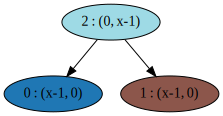

In [25]:
graphviz.Source(gv_str)

In [26]:
morse_graph_data, cubical_complex = morse_graph_from_edges(edges, grid_size)

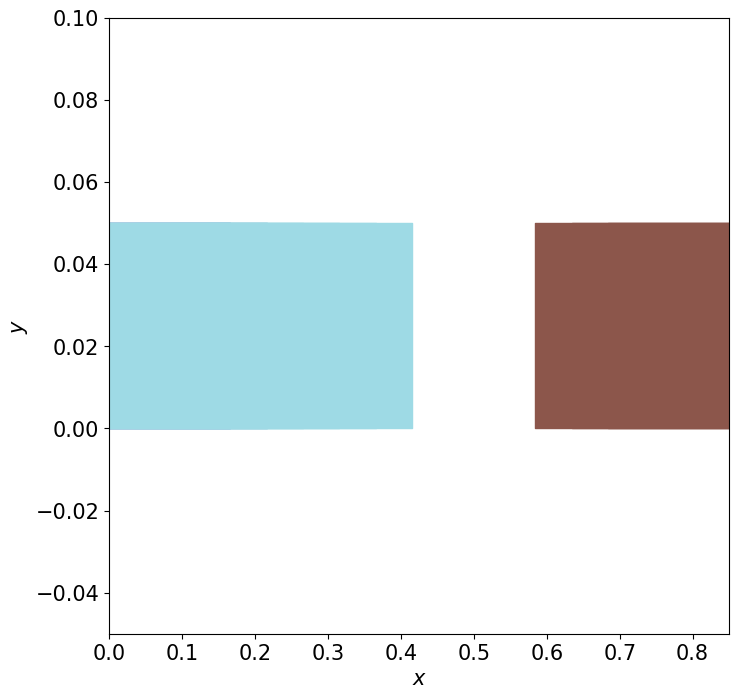

In [27]:
CMGDB_utils.PlotMorseSets(morse_graph_data, cubical_complex)

In [59]:
att_vertices, att_edges, att_labels = compute_lattice_attractorst(edges, grid_size)

In [60]:
att_vertices

[0, 1, 2, 3, 4]

In [61]:
att_edges

[(1, 0), (2, 0), (3, 1), (3, 2), (4, 3)]

In [62]:
att_labels

['{ }', '{0}', '{1}', '{0, 1}', '{0, 1, 2}']

In [7]:
morse_graph, cubical_complex = compute_dynamics(edges, grid_size)

In [47]:
graph = CMGDB_utils.PlotMorseGraph(morse_graph)

In [53]:
aa = str(graph)

In [54]:
bb = graph.source

In [56]:
aa == bb

True

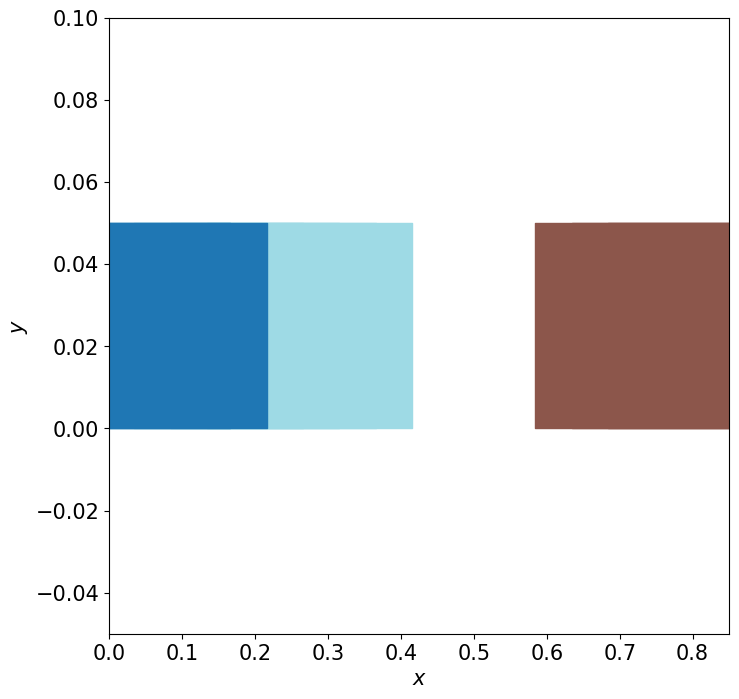

In [13]:
CMGDB_utils.PlotMorseSets(morse_graph, cubical_complex, morse_nodes=[1, 2, 0])

In [63]:
grid_size = [2, 2]

edges = [(0, 0), (1, 0), (1, 1), (2, 0), (2, 2), (3, 0), (3, 1), (3, 2), (3, 3)]

In [64]:
morse_graph, cubical_complex = compute_dynamics(edges, grid_size)

In [66]:
gv_graph = CMGDB_utils.PlotMorseGraph(morse_graph)

In [67]:
str(gv_graph)

'digraph {\n0 [label="0 : (x-1, 0, 0)", shape=ellipse, style=filled, fillcolor="#1f77b4ff", margin="0.11, 0.055"];\n1 [label="1 : (0, 0, 0)", shape=ellipse, style=filled, fillcolor="#d62728ff", margin="0.11, 0.055"];\n2 [label="2 : (0, 0, 0)", shape=ellipse, style=filled, fillcolor="#f7b6d2ff", margin="0.11, 0.055"];\n3 [label="3 : (0, 0, 0)", shape=ellipse, style=filled, fillcolor="#9edae5ff", margin="0.11, 0.055"];\n{rank=same; 0 }; \n1 -> 0;\n2 -> 0;\n3 -> 1;\n3 -> 2;\n}\n'

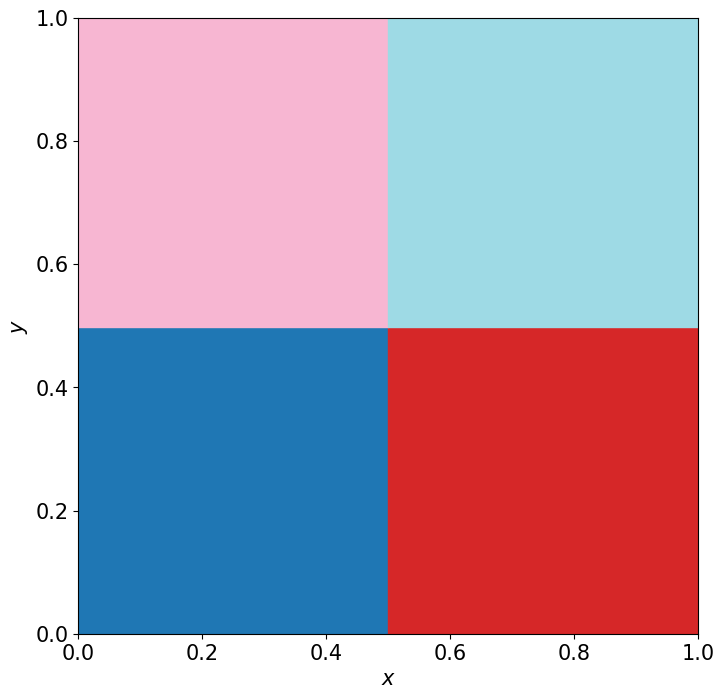

In [19]:
CMGDB_utils.PlotMorseSets(morse_graph, cubical_complex)

In [3]:
grid_size = [20]

edges = []
for v1 in range(20):
    for v2 in map_graph.adjacencies(v1):
        edges.append((v1, v2))

print(edges)

NameError: name 'map_graph' is not defined

In [169]:
compute_stuff(edges, grid_size)

defaultdict(<class 'list'>, {0: [0, 1], 1: [0, 1], 2: [0, 1, 2, 3], 3: [1, 2, 3, 4], 4: [2, 3, 4, 5, 6, 7], 5: [4, 5, 6, 7, 8, 9, 10], 6: [7, 8, 9, 10], 7: [8, 9, 10, 11, 12], 8: [10, 11, 12, 13], 9: [11, 12, 13, 14], 10: [12, 13, 14], 11: [13, 14, 15], 12: [14, 15], 13: [14, 15], 14: [14, 15, 16], 15: [14, 15, 16], 16: [14, 15, 16], 17: [14, 15, 16], 18: [14, 15, 16], 19: [13, 14, 15, 16]})


In [ ]:
lower_bounds = [0.0, 0.0]
upper_bounds = [90.0, 70.0]
grid_size = [200, 200]

model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='MultiBoxMap', padding=False)

In [ ]:
Model:
    def __init__(self, lower_bounds, upper_bounds, grid_size, F, periodic=None, map_type='BoxMap', padding=False):

In [ ]:
ComputeConleyMorseGraph(model, acyclic_check=True)

In [2]:
import DSGRN
import DSGRN_utils
import CMGDB_utils
import pychomp

import random
import time

In [3]:
import CMGDB

In [157]:
def f(x):
    a = 1.0
    b = 0.1
    r = 2.1 # 1.9
    return [x[0] * np.exp(r - x[0] - a / (x[0] + b))]

def F(rect):
    return CMGDB.BoxMap(f, rect, padding=True)

lower_bounds = [0.0]
upper_bounds = [2.0]

subdiv_min = 4
subdiv_max = 5
subdiv_init = 4
subdiv_limit = 10000

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit, lower_bounds, upper_bounds, F)

In [ ]:
0: [1]
1: [2]
2: [4]
3: [8]
4: [16]
5: [32]

In [158]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 1.28 ms, sys: 91 μs, total: 1.37 ms
Wall time: 1.37 ms


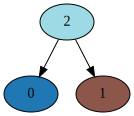

In [159]:
CMGDB.PlotMorseGraph(morse_graph)

In [160]:
map_graph.num_vertices()

20

In [161]:
map_graph.adjacencies(0)

[0, 1]

In [162]:
grid_size = [20]

edges = []
for v1 in range(20):
    for v2 in map_graph.adjacencies(v1):
        edges.append((v1, v2))

print(edges)

[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3), (3, 4), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 7), (6, 8), (6, 9), (6, 10), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (8, 10), (8, 11), (8, 12), (8, 13), (9, 11), (9, 12), (9, 13), (9, 14), (10, 12), (10, 13), (10, 14), (11, 13), (11, 14), (11, 15), (12, 14), (12, 15), (13, 14), (13, 15), (14, 14), (14, 15), (14, 16), (15, 14), (15, 15), (15, 16), (16, 14), (16, 15), (16, 16), (17, 14), (17, 15), (17, 16), (18, 14), (18, 15), (18, 16), (19, 13), (19, 14), (19, 15), (19, 16)]


In [4]:
def f(x):
    return [x[0] / (2.0 - x[0]), x[1] / (2.0 - x[1])]

def F(rect):
    return CMGDB.BoxMap(f, rect, padding=False)

subdiv_min = 2
subdiv_max = 3
subdiv_init = 2
subdiv_limit = 10000
lower_bounds = [0.0, 0.0]
upper_bounds = [1.0, 1.0]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit, lower_bounds, upper_bounds, F)

In [5]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 614 μs, sys: 79 μs, total: 693 μs
Wall time: 702 μs


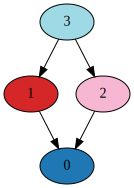

In [6]:
CMGDB.PlotMorseGraph(morse_graph)

In [7]:
morse_graph.phase_space_box(0)

[0.0, 0.0, 0.5, 0.5]

In [8]:
morse_graph.phase_space_box(1)

[0.0, 0.5, 0.5, 1.0]

In [9]:
map_graph.num_vertices()

4

In [ ]:
0: [1, 1]
1: [2, 1]
2: [2, 2]
3: [4, 2]
4: [4, 4]
5: [8, 4]

In [10]:
grid_size = [2, 2]

edges = []
for v1 in range(4):
    for v2 in map_graph.adjacencies(v1):
        edges.append((v1, v2))

print(edges)

[(0, 0), (1, 0), (1, 1), (2, 0), (2, 2), (3, 0), (3, 1), (3, 2), (3, 3)]


In [61]:
import numpy as np

In [62]:
grid_size = (3, 4)

In [70]:
index = 1
np.unravel_index(index, grid_size, order='F')

(1, 0)

In [ ]:
np.ravel_multi_index(coords, self.grid_size, order='F')

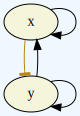

In [2]:
net_spec = """x : x + y
              y : (~x) y"""

network = DSGRN.Network(net_spec)

DSGRN.DrawGraph(network)

In [3]:
parameter_graph = DSGRN.ParameterGraph(network)

print('Parameter graph size:', parameter_graph.size())

Parameter graph size: 1600


In [4]:
# par_index = 752
par_index = 987

parameter = parameter_graph.parameter(par_index)

morse_graph, stg, graded_complex = DSGRN_utils.ConleyMorseGraph(parameter)

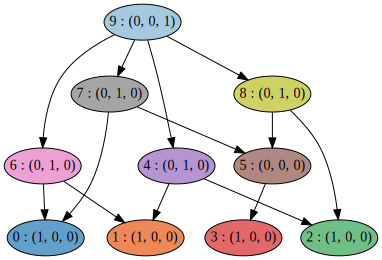

In [5]:
DSGRN_utils.PlotMorseGraph(morse_graph)

In [6]:
%%time
latt_attractors = CMGDB_utils.lattice_attractors(morse_graph)

CPU times: user 4.46 ms, sys: 566 μs, total: 5.03 ms
Wall time: 4.71 ms


In [7]:
%%time
latt_repellers = CMGDB_utils.lattice_repellers(morse_graph)

CPU times: user 4.25 ms, sys: 153 μs, total: 4.4 ms
Wall time: 4.39 ms


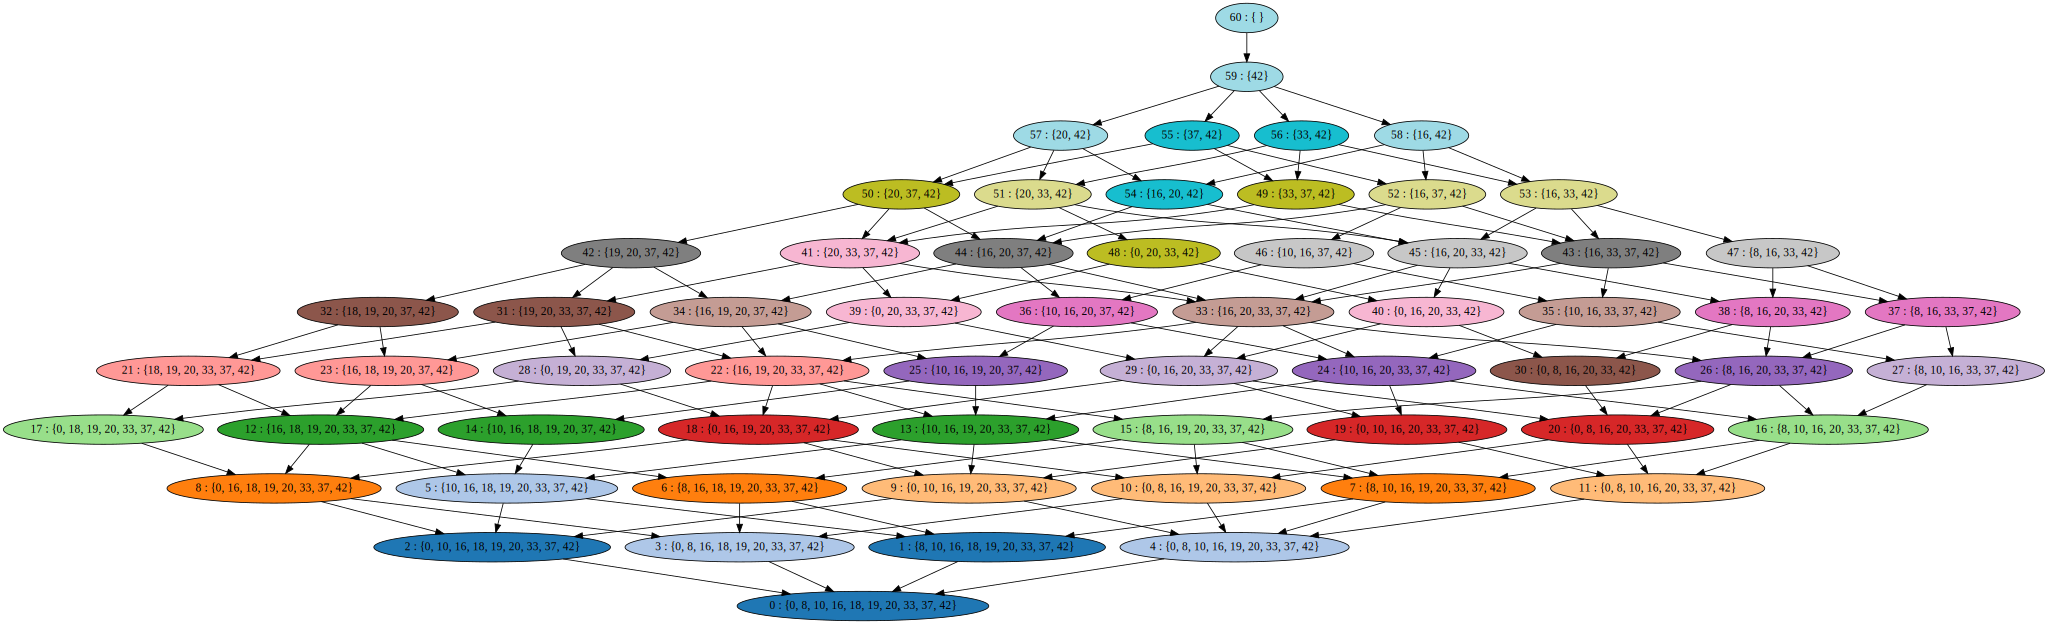

In [8]:
CMGDB_utils.PlotGraph(latt_repellers)
# CMGDB_utils.PlotGraph(latt_attractors)

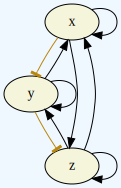

In [9]:
net_spec = """x : x + y + z
              y : (~x) (y + z)
              z : (~y) (x + z)"""

network = DSGRN.Network(net_spec)

DSGRN.DrawGraph(network)

In [10]:
parameter_graph = DSGRN.ParameterGraph(network)

print('Parameter graph size:', parameter_graph.size())

Parameter graph size: 87280405632


In [11]:
par_index = 52718681997
# par_index = 52717613010
# par_index = 52717613012

parameter = parameter_graph.parameter(par_index)

morse_graph, stg, graded_complex = DSGRN_utils.ConleyMorseGraph(parameter)

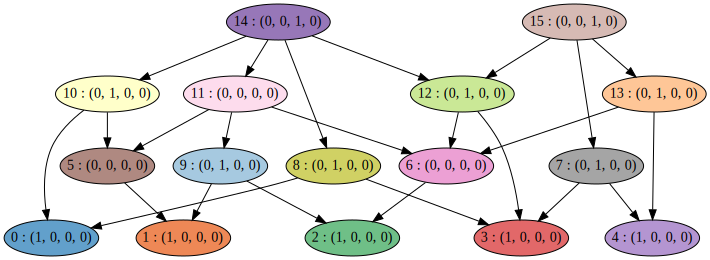

In [12]:
DSGRN_utils.PlotMorseGraph(morse_graph)

In [102]:
%%time
att = CMGDB_utils.morse_graph_attractors(morse_graph)

CPU times: user 101 μs, sys: 17 μs, total: 118 μs
Wall time: 121 μs


In [103]:
%%time
att_slow = CMGDB_utils.morse_graph_attractors_slow(morse_graph)

CPU times: user 116 μs, sys: 1 μs, total: 117 μs
Wall time: 121 μs


In [104]:
%%time
att_2 = CMGDB_utils.morse_graph_attractors_2(morse_graph)

CPU times: user 109 μs, sys: 8 μs, total: 117 μs
Wall time: 119 μs


In [105]:
%%time
att_slow_2 = CMGDB_utils.morse_graph_attractors_slow_2(morse_graph)

CPU times: user 102 μs, sys: 1 μs, total: 103 μs
Wall time: 106 μs


In [107]:
%%time
att_slow_3 = CMGDB_utils.morse_graph_attractors_slow_3(morse_graph)

CPU times: user 126 μs, sys: 1e+03 ns, total: 127 μs
Wall time: 131 μs


In [108]:
len(att)

8

In [109]:
att == att_slow, att_slow == att_2, att_2 == att_slow_2, att_slow_2 == att_slow_3

(True, True, True, True)

In [13]:
%%time
attractors = CMGDB_utils.morse_graph_attractors(morse_graph)

CPU times: user 1.8 ms, sys: 97 μs, total: 1.9 ms
Wall time: 1.91 ms


In [8]:
len(attractors)

109046

In [13]:
%%time
latt_attractors = CMGDB_utils.lattice_attractors(morse_graph)

CPU times: user 349 ms, sys: 13 ms, total: 362 ms
Wall time: 363 ms


In [14]:
len(latt_attractors.vertices())

443

In [15]:
%%time
latt_repellers = CMGDB_utils.lattice_repellers(morse_graph)

CPU times: user 287 ms, sys: 4.82 ms, total: 291 ms
Wall time: 292 ms


In [16]:
len(latt_repellers.vertices())

443

In [16]:
# CMGDB_utils.PlotGraph(latt_attractors)

In [17]:
import CMGDB
import CMGDB_utils

import numpy as np
import time

## Logistic map example

In [18]:
def f(x):
    r = 3.2
    return [r * x[0] * (1.0 - x[0])]

def F(rect):
    return CMGDB.BoxMap(f, rect, padding=True)

lower_bounds = [-0.1]
upper_bounds = [1.0]

subdiv_min = 12
subdiv_max = 15
subdiv_init = 8
subdiv_limit = 10000

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit, lower_bounds, upper_bounds, F)

In [19]:
%%time
# morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 14.6 ms, sys: 1.31 ms, total: 15.9 ms
Wall time: 14.9 ms


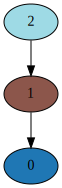

In [20]:
CMGDB.PlotMorseGraph(morse_graph)

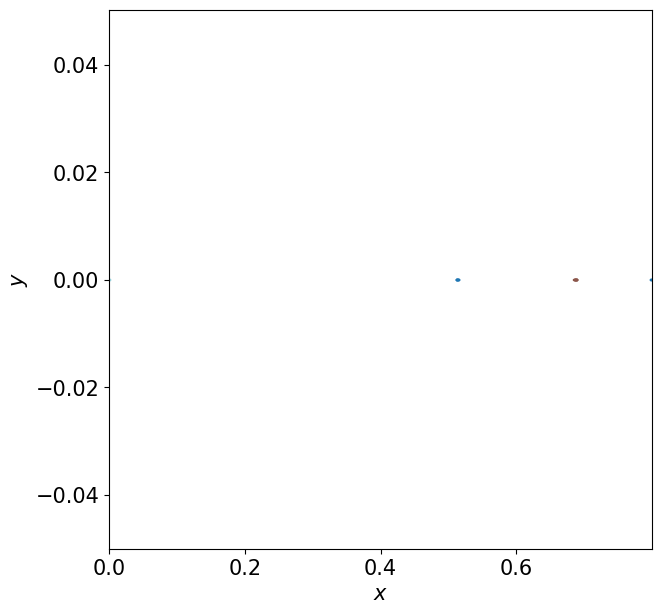

In [21]:
CMGDB.PlotMorseSets(morse_graph, fig_w=7, fig_h=7)

In [24]:
%%time
latt_attractors = CMGDB_utils.lattice_attractors(morse_graph)

CPU times: user 120 μs, sys: 1 μs, total: 121 μs
Wall time: 125 μs


In [25]:
%%time
latt_repellers = CMGDB_utils.lattice_repellers(morse_graph)

CPU times: user 132 μs, sys: 1e+03 ns, total: 133 μs
Wall time: 138 μs


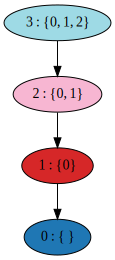

In [26]:
CMGDB_utils.PlotGraph(latt_attractors)

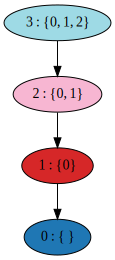

In [27]:
CMGDB_utils.PlotMorseGraph(latt_attractors)

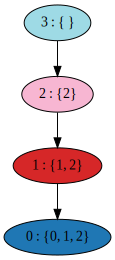

In [28]:
CMGDB_utils.PlotGraph(latt_repellers)

## Simple 2D map example

In [33]:
def f(x):
    return [x[0] / (2.0 - x[0]), x[1] / (2.0 - x[1])]

def F(rect):
    return CMGDB.BoxMap(f, rect, padding=False)

subdiv_min = 6
subdiv_max = 8
subdiv_init = 4
subdiv_limit = 10000
lower_bounds = [0.0, 0.0]
upper_bounds = [1.0, 1.0]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit, lower_bounds, upper_bounds, F)

In [34]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 4.15 ms, sys: 151 μs, total: 4.3 ms
Wall time: 4.32 ms


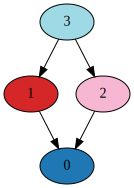

In [35]:
CMGDB.PlotMorseGraph(morse_graph)

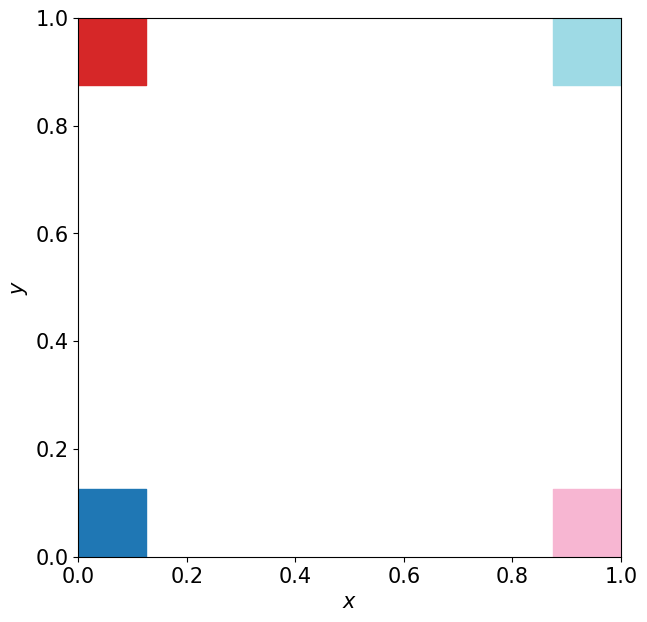

In [36]:
CMGDB.PlotMorseSets(morse_graph, fig_w=7, fig_h=7)

In [37]:
%%time
latt_attractors = CMGDB_utils.lattice_attractors(morse_graph)

CPU times: user 211 μs, sys: 35 μs, total: 246 μs
Wall time: 253 μs


In [38]:
%%time
latt_repellers = CMGDB_utils.lattice_repellers(morse_graph)

CPU times: user 210 μs, sys: 10 μs, total: 220 μs
Wall time: 225 μs


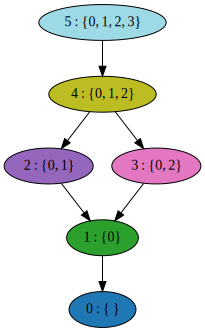

In [39]:
CMGDB_utils.PlotGraph(latt_attractors)

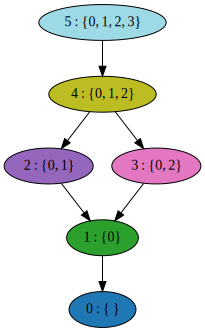

In [40]:
CMGDB_utils.PlotMorseGraph(latt_attractors)

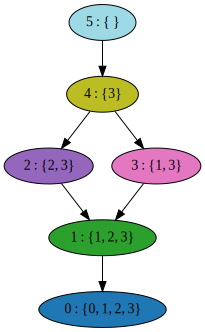

In [41]:
CMGDB_utils.PlotGraph(latt_repellers)

## Leslie map examples

In [42]:
def f(x):
    th1 = 19.6
    th2 = 23.68
    return [(th1 * x[0] + th2 * x[1]) * np.exp (-0.1 * (x[0] + x[1])), 0.7 * x[0]]

In [43]:
def F(rect):
    return CMGDB_utils.BoxMap(f, rect)

In [44]:
lower_bounds = [0.0, 0.0]
upper_bounds = [90.0, 70.0]
grid_size = [500, 500]

model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='BoxMap', padding=False)
# model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='B', padding=False)

In [45]:
%%time
morse_graph, cubical_complex = CMGDB_utils.ComputeMorseGraph(model)

CPU times: user 11.3 s, sys: 183 ms, total: 11.5 s
Wall time: 11.4 s


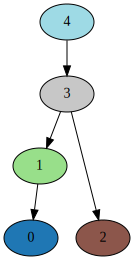

In [46]:
CMGDB_utils.PlotMorseGraph(morse_graph)

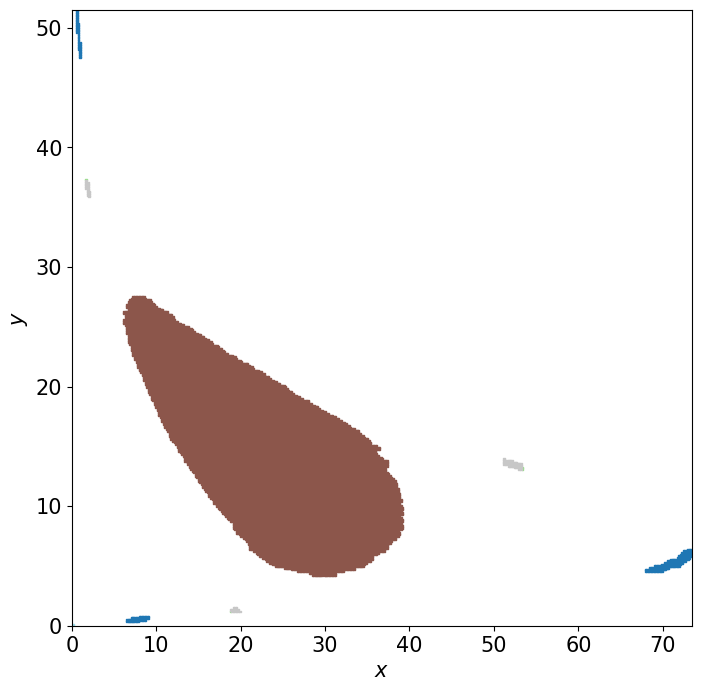

In [47]:
CMGDB_utils.PlotMorseSets(morse_graph, cubical_complex)

In [48]:
%%time
latt_attractors = CMGDB_utils.lattice_attractors(morse_graph[0])

CPU times: user 180 μs, sys: 21 μs, total: 201 μs
Wall time: 206 μs


In [49]:
%%time
latt_repellers = CMGDB_utils.lattice_repellers(morse_graph[0])

CPU times: user 204 μs, sys: 5 μs, total: 209 μs
Wall time: 212 μs


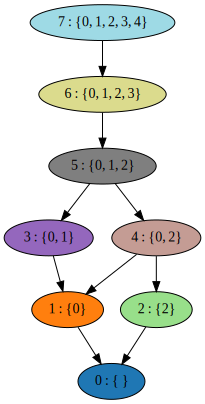

In [50]:
CMGDB_utils.PlotGraph(latt_attractors)

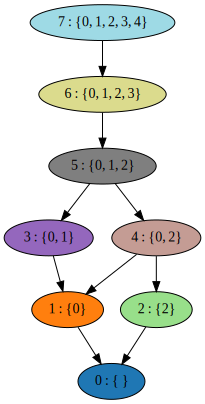

In [51]:
CMGDB_utils.PlotMorseGraph(latt_attractors)

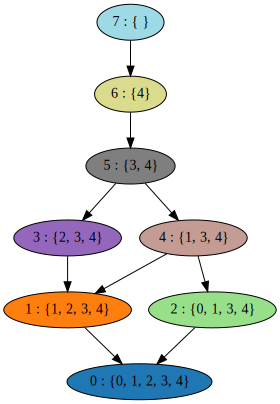

In [52]:
CMGDB_utils.PlotGraph(latt_repellers)

## Conley index example

In [53]:
%%time
morse_graph, cubical_complex = CMGDB_utils.ComputeConleyMorseGraph(model)

CPU times: user 11.7 s, sys: 142 ms, total: 11.9 s
Wall time: 11.8 s


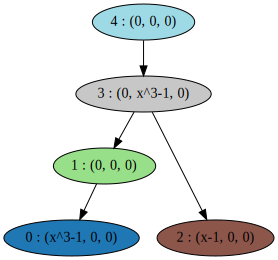

In [54]:
CMGDB_utils.PlotMorseGraph(morse_graph)

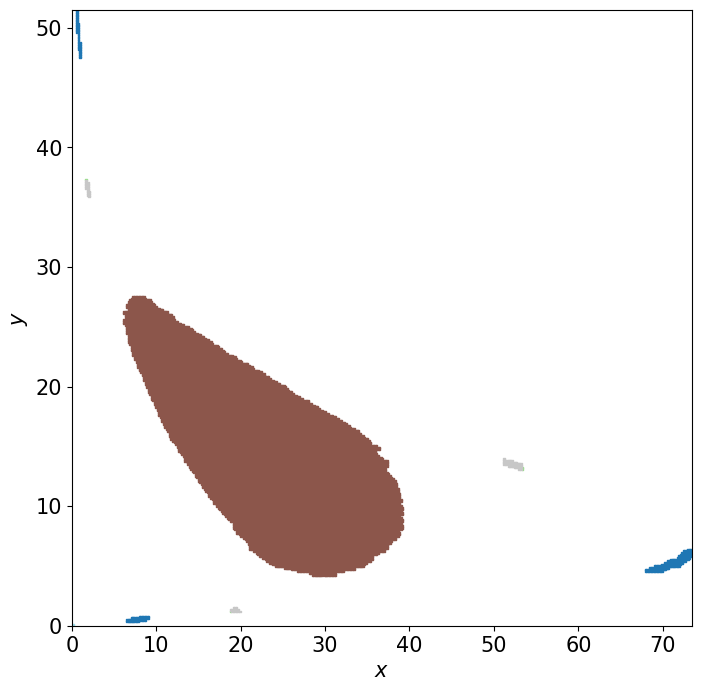

In [55]:
CMGDB_utils.PlotMorseSets(morse_graph, cubical_complex)

In [56]:
%%time
latt_attractors = CMGDB_utils.lattice_attractors(morse_graph[0])

CPU times: user 175 μs, sys: 20 μs, total: 195 μs
Wall time: 199 μs


In [57]:
%%time
latt_repellers = CMGDB_utils.lattice_repellers(morse_graph[0])

CPU times: user 206 μs, sys: 12 μs, total: 218 μs
Wall time: 224 μs


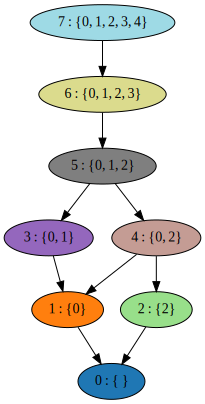

In [58]:
CMGDB_utils.PlotGraph(latt_attractors)

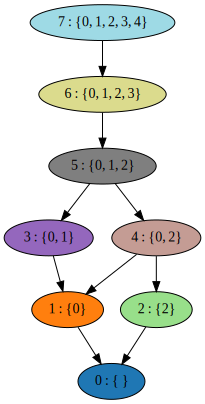

In [59]:
CMGDB_utils.PlotMorseGraph(latt_attractors)

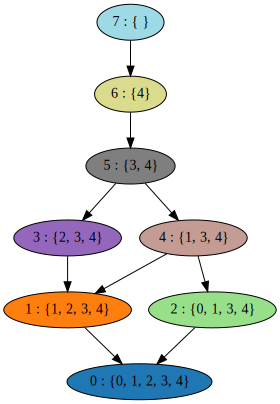

In [60]:
CMGDB_utils.PlotGraph(latt_repellers)